# Proyecto 03 - Series de Tiempo
### Dataset: Flujo Vehicular por Unidades de Peaje AUSA
##### Recuerda descargar el dataset de aquí. Deberás descargar - al menos para comenzar - los años 2017, 2018 y 2019.

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

###### Importante: Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

#### Exploración de datos
Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
2. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. Pista: primer semestre 2019.

### Predicción a Futuro
Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
2. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
3. Elige un modelo benchmark y compara tus resultados con este modelo.
4. Optimiza los hiperparámetros de tu modelo.
5. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
6. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
7. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?


#### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
3. ¿Hay algo que te gustaría investigar o probar?
¡Tómate tiempo para investigar y leer mucho!

## Importación de librerias 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
#Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
#Statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
#Otros
from prettytable import PrettyTable

Importing plotly failed. Interactive plots will not work.


## Datasets 

In [3]:

data_2016 = pd.read_csv('flujo-vehicular-2016.csv')
data_2017 = pd.read_csv('flujo-vehicular-2017-2.csv')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv')
data_2020 = pd.read_csv('flujo-vehicular-2020.csv')

In [4]:
data1=[data_2016,data_2017,data_2018,data_2019]

### Inspeccion de valores nulos

In [5]:
for idx, dataset in enumerate(data1):
    print(f'Tamaño del dataset {2016+idx}: {dataset.shape}')
    print(f'Cantidad de valores nulos (por todas las columnas) = {dataset.isna().sum().sum()}\n')

Tamaño del dataset 2016: (1379443, 10)
Cantidad de valores nulos (por todas las columnas) = 0

Tamaño del dataset 2017: (1372645, 10)
Cantidad de valores nulos (por todas las columnas) = 0

Tamaño del dataset 2018: (1375908, 10)
Cantidad de valores nulos (por todas las columnas) = 0

Tamaño del dataset 2019: (812153, 10)
Cantidad de valores nulos (por todas las columnas) = 0



### Inspeccion de valores unicos

In [6]:
def unique_values(dataset):
    '''Función para imprimir valores únicos de las columnas del dataset 
    suministrado.'''
    for column in dataset.columns:
        print(f'Columna {column}:\n{dataset[column].unique()}\nCantidad de valores:{len(dataset[column].unique())}\n')

## Estaciones

In [7]:
for idx, dataset in enumerate(data1):
    print(f'AÑO {2016+idx}:')
    unique_values(dataset.loc[:,["estacion"]])
    print('-'*75)


AÑO 2016:
Columna estacion:
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
Cantidad de valores:8

---------------------------------------------------------------------------
AÑO 2017:
Columna estacion:
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
Cantidad de valores:8

---------------------------------------------------------------------------
AÑO 2018:
Columna estacion:
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
Cantidad de valores:8

---------------------------------------------------------------------------
AÑO 2019:
Columna estacion:
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
Cantidad de valores:8

---------------------------------------------------------------------------


## Sentido

In [8]:
for idx, dataset in enumerate(data1):
    print(f'AÑO {2016+idx}:')
    unique_values(dataset.loc[:,["sentido"]])
    print('-'*75)

AÑO 2016:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2017:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2018:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2019:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------


## Tipo de vehiulo

In [9]:
for idx, dataset in enumerate(data1):
    print(f'AÑO {2016+idx}:')
    unique_values(dataset.loc[:,["sentido"]])
    print('-'*75)

AÑO 2016:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2017:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2018:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2019:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------


## Forma de pago

In [10]:
for idx, dataset in enumerate(data1):
    print(f'AÑO {2016+idx}:')
    unique_values(dataset.loc[:,["sentido"]])
    print('-'*75)

AÑO 2016:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2017:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2018:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------
AÑO 2019:
Columna sentido:
['Centro' 'Provincia']
Cantidad de valores:2

---------------------------------------------------------------------------


## Cantidad de vehiculos

In [11]:
def pareto_cantidad_pasos(column:str,pareto_line=True,figsize_g=(16,8),grid=True):
    '''Esta funccion permite generar un graficco dde paretto para los 4 años de data eligiendo las columna ccon las que se desea estudiar'''
    plt.figure(figsize=figsize_g)
    for idx,dataset in enumerate(data1):
        conteo_estacion = dataset.groupby(by=column).agg('sum')[['cantidad_pasos']].sort_values(by='cantidad_pasos',ascending=False)          
        conteo_estacion["cumpercentage"] = conteo_estacion['cantidad_pasos'].cumsum()/conteo_estacion['cantidad_pasos'].sum()*100
        plt.subplot(2,2,idx+1)
        conteo_bar=sns.barplot(x=conteo_estacion.index,y='cantidad_pasos',data=conteo_estacion, palette="mako")
        plt.xticks(rotation=45,ha='right')
        if pareto_line==True:
            ax2=plt.twinx()
            ax2.plot(conteo_estacion.index,conteo_estacion["cumpercentage"],color="#ff5400",marker='D',ms=7)
            ax2.yaxis.set_major_formatter(PercentFormatter())     
            ax2.tick_params(axis="y", colors="#ff5400")
        for p in conteo_bar.patches: 
            conteo_bar.annotate(format(p.get_height(), ',.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        plt.title(f'{2016+idx}',fontweight='bold')   
        sns.despine()
        if grid == True:
            plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

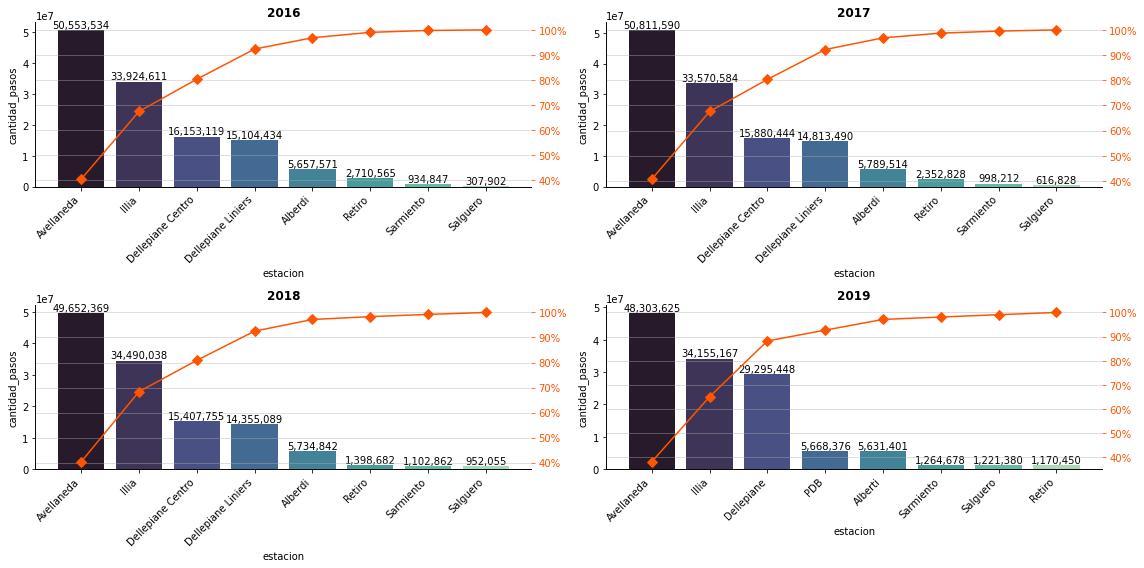

In [12]:
pareto_cantidad_pasos('estacion')

## Sentido

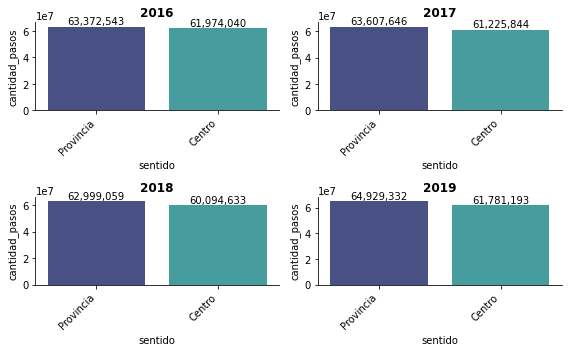

In [13]:
pareto_cantidad_pasos(column='sentido',
                      pareto_line=False, figsize_g=(8, 5), grid=False)

## Tipo de vehiculo

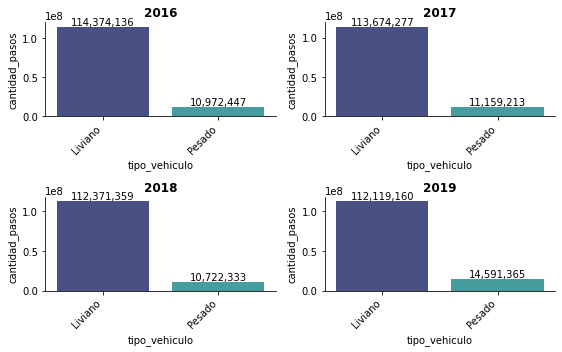

In [14]:
pareto_cantidad_pasos(column='tipo_vehiculo',
                      pareto_line=False, figsize_g=(8, 5), grid=False)

## Forma de pago

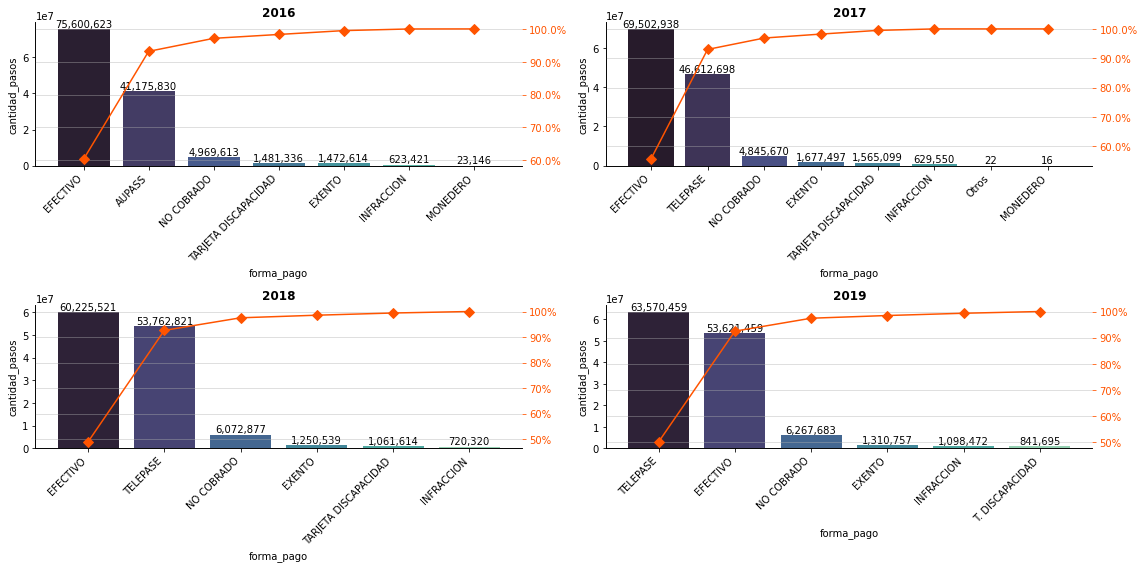

In [15]:
pareto_cantidad_pasos(column='forma_pago')

Se puede observar que el meto de pago efectivo y Telepase son los preferiddos por los conductores

In [16]:
dias_semana=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

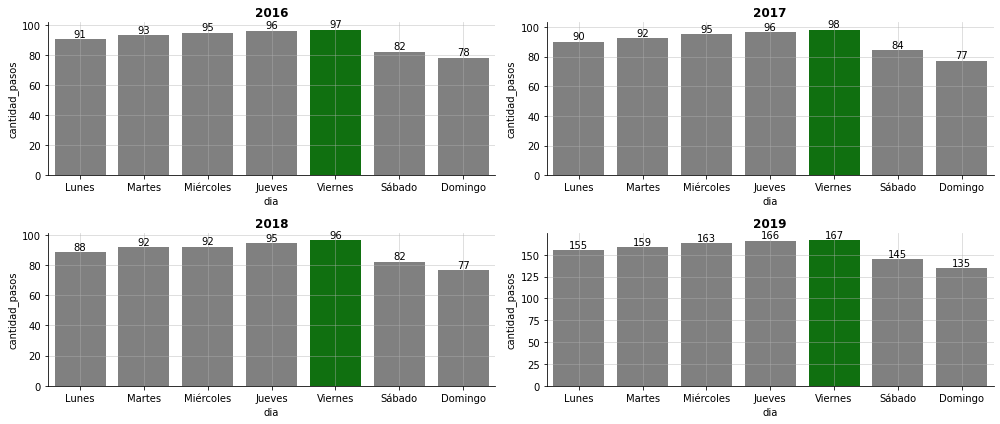

In [17]:
plt.figure(figsize=(14,6))
for idx,dataset in enumerate(data1):
    conteo_dia = dataset.groupby(by='dia').agg('mean')[['cantidad_pasos']].reindex(dias_semana)
    plt.subplot(2,2,idx+1)
    pasos_dia=sns.barplot(x=conteo_dia.index,y='cantidad_pasos',data=conteo_dia,                           
                          palette=['grey' if (x < max(conteo_dia.cantidad_pasos)) else 'green' for x in conteo_dia.cantidad_pasos])
    plt.xticks(rotation=0,ha='center')    
    for p in pasos_dia.patches: 
        pasos_dia.annotate(format(p.get_height(), ',.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title(f'{2016+idx}',fontweight='bold')
    sns.despine()
    plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Se observa que entre semana hay un ritmo muy parecido dde transito vehicular, siendo el dia viernes el mas concurido en promedio

### Temporalidad en el dia

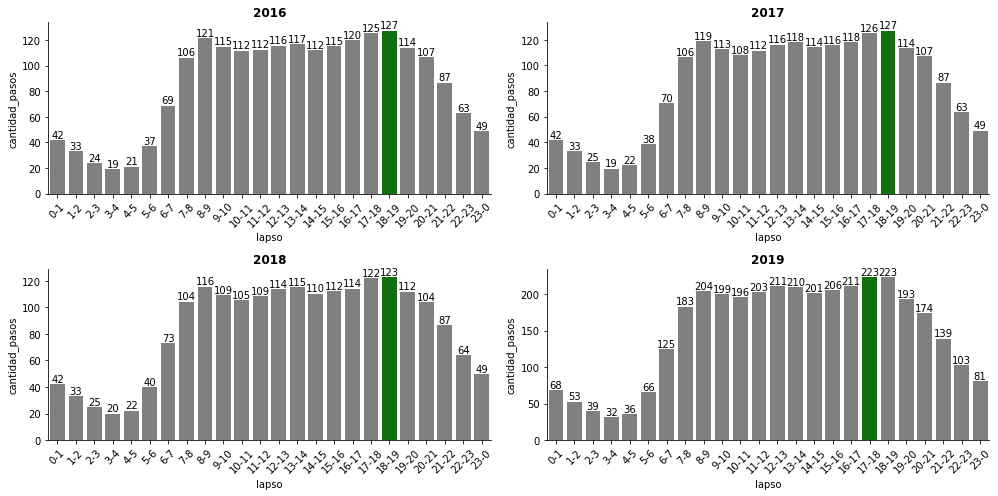

In [18]:

plt.figure(figsize=(14,7))
for idx,dataset in enumerate(data1):
    pasos_horas=dataset.groupby(by=['hora_inicio','hora_fin']).agg('mean')[['cantidad_pasos']].reset_index()
    pasos_horas['hora_inicio']=pasos_horas['hora_inicio'].astype(str)
    pasos_horas['hora_fin']=pasos_horas['hora_fin'].astype(str)
    pasos_horas['lapso']= pasos_horas['hora_inicio']+'-'+pasos_horas['hora_fin']
    pasos_horas=pasos_horas.drop(columns=['hora_inicio','hora_fin']).set_index('lapso')
    plt.subplot(2,2,idx+1)
    pasos_hora_g=sns.barplot(x=pasos_horas.index,y='cantidad_pasos',data=pasos_horas,                           
                          palette=['grey' if (x < max(pasos_horas.cantidad_pasos)) else 'green' for x in pasos_horas.cantidad_pasos])
    plt.xticks(rotation=45,ha='center')    
    for p in pasos_hora_g.patches: 
        pasos_hora_g.annotate(format(p.get_height(), ',.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title(f'{2016+idx}',fontweight='bold')
    sns.despine()
plt.tight_layout()
plt.show()

Del 2016-2019 la franja horaria de 18-19 H es la mas conccurrida

## Como se indica en la bitacora se esccojera la estacion Illia y el metodo de pago efectivo

In [19]:
dataset_all = pd.concat(data1)

mascara = np.logical_and(dataset_all.estacion=='Illia', dataset_all.forma_pago == 'EFECTIVO')
dataset_illia_t = dataset_all[mascara].copy()


dataset_illia_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_illia_t.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
1700,2016-01-01,4,Viernes,Centro,Liviano,3
1703,2016-01-01,4,Viernes,Centro,Liviano,446
1708,2016-01-01,4,Viernes,Centro,Pesado,8
1711,2016-01-01,5,Viernes,Centro,Liviano,10
1712,2016-01-01,5,Viernes,Centro,Liviano,396


In [20]:
#Pasamos la columna fecha a formato datetime, y añadimos hora_fin como la hora de esa fecha.
dataset_illia_t['fecha_2'] = pd.to_datetime(dataset_illia_t.fecha) + pd.to_timedelta(dataset_illia_t.hora_fin, unit = 'h')

#Dropeamos las columnas de fecha y hora fin, además cambiamos el nombre a la nueva fecha creada
dataset_illia_t.drop(columns=['fecha','hora_fin'],inplace=True)
dataset_illia_t.rename(columns = {'fecha_2':'fecha'},inplace=True)
dataset_illia_t.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
1700,Viernes,Centro,Liviano,3,2016-01-01 04:00:00
1703,Viernes,Centro,Liviano,446,2016-01-01 04:00:00
1708,Viernes,Centro,Pesado,8,2016-01-01 04:00:00
1711,Viernes,Centro,Liviano,10,2016-01-01 05:00:00
1712,Viernes,Centro,Liviano,396,2016-01-01 05:00:00


In [21]:
#Reordenamos el dataset por fecha
dataset_illia_t.sort_values('fecha', inplace = True)
dataset_illia_t.reset_index(drop=True, inplace = True)
dataset_illia_t.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Viernes,Centro,Liviano,14,2016-01-01
1,Viernes,Provincia,Pesado,4,2016-01-01
2,Viernes,Provincia,Liviano,385,2016-01-01
3,Viernes,Provincia,Liviano,8,2016-01-01
4,Viernes,Centro,Liviano,649,2016-01-01


Se analiza la proporcion del pago en efectivo con respecto a las demas 

In [22]:
tabla_01 = PrettyTable()
tabla_01.field_names = ["Año", "Todas las formas de pago", "Efectivo", "Proporción efectivo"]
tabla_01.add_row(["2016", data_2016[data_2016.estacion == 'Illia'].shape[0], dataset_illia_t[dataset_illia_t.fecha <= '2016-12-31 23:00:00'].shape[0],
                  dataset_illia_t[dataset_illia_t.fecha <= '2016-12-31 23:00:00'].shape[0]/data_2016[data_2016.estacion == 'Illia'].shape[0]])
tabla_01.add_row(["2017", data_2017[data_2017.estacion == 'Illia'].shape[0], dataset_illia_t[(dataset_illia_t.fecha >= '2017-01-01 00:00:00') & (dataset_illia_t.fecha <= '2017-12-31 23:00:00')
                                                                                            ].shape[0], dataset_illia_t[(dataset_illia_t.fecha >= '2017-01-01 00:00:00') & (dataset_illia_t.fecha <= '2017-12-31 23:00:00')].shape[0]/data_2017[data_2017.estacion == 'Illia'].shape[0]])
tabla_01.add_row(["2018", data_2018[data_2018.estacion == 'Illia'].shape[0], dataset_illia_t[(dataset_illia_t.fecha >= '2018-01-01 00:00:00') & (dataset_illia_t.fecha <= '2018-12-31 23:00:00')
                                                                                            ].shape[0], dataset_illia_t[(dataset_illia_t.fecha >= '2018-01-01 00:00:00') & (dataset_illia_t.fecha <= '2018-12-31 23:00:00')].shape[0]/data_2018[data_2018.estacion == 'Illia'].shape[0]])
tabla_01.add_row(["2019", data_2019[data_2019.estacion == 'Illia'].shape[0], dataset_illia_t[(dataset_illia_t.fecha >= '2019-01-01 00:00:00') & (dataset_illia_t.fecha <= '2019-12-31 23:00:00')
                                                                                            ].shape[0], dataset_illia_t[(dataset_illia_t.fecha >= '2019-01-01 00:00:00') & (dataset_illia_t.fecha <= '2019-12-31 23:00:00')].shape[0]/data_2019[data_2019.estacion == 'Illia'].shape[0]])
print(tabla_01)


+------+--------------------------+----------+---------------------+
| Año  | Todas las formas de pago | Efectivo | Proporción efectivo |
+------+--------------------------+----------+---------------------+
| 2016 |          302910          |  107697  | 0.35554124987620084 |
| 2017 |          291900          |  104230  |  0.3570743405275779 |
| 2018 |          299519          |  99996   |  0.3338552813010193 |
| 2019 |          161133          |  34643   | 0.21499630739823625 |
+------+--------------------------+----------+---------------------+


## Cantidadd de vehiculos en Illia

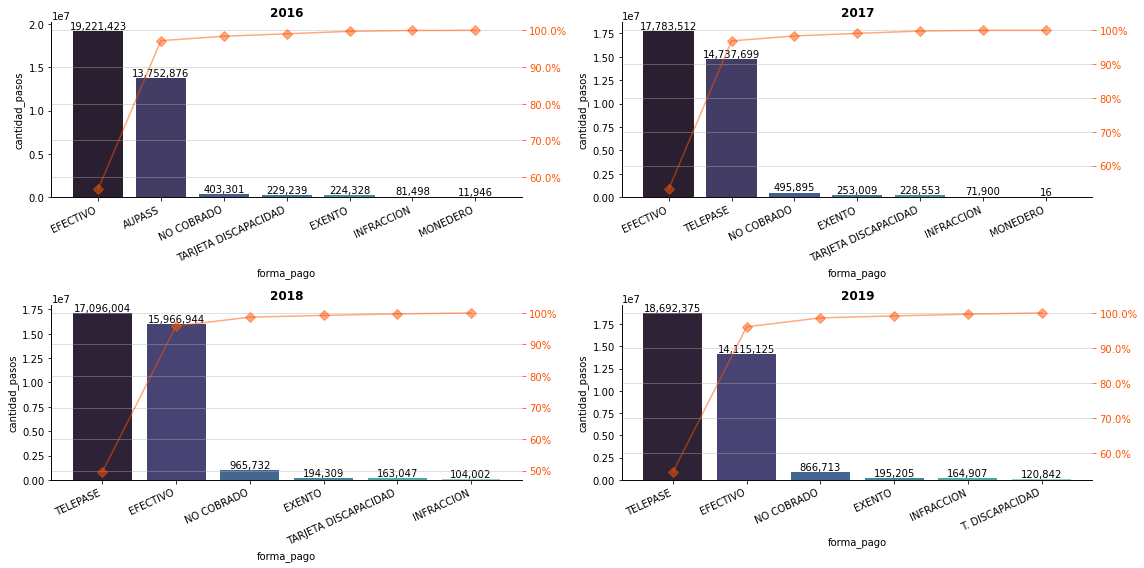

In [23]:
plt.figure(figsize=(16, 8))
for idx, dataset in enumerate(data1):
    conteo_fpago = dataset[dataset.estacion == 'Illia'].groupby(by='forma_pago').agg(
        'sum')[['cantidad_pasos']].sort_values(by='cantidad_pasos', ascending=False)
    conteo_fpago["cumpercentage"] = conteo_fpago['cantidad_pasos'].cumsum(
    )/conteo_fpago['cantidad_pasos'].sum()*100
    plt.subplot(2, 2, idx+1)
    conteo_bar = sns.barplot(
        x=conteo_fpago.index, y='cantidad_pasos', data=conteo_fpago, palette="mako")
    plt.xticks(rotation=25, ha='right')
    ax2 = plt.twinx()
    ax2.plot(conteo_fpago.index,
             conteo_fpago["cumpercentage"], color="#ff5400", marker='D', ms=7, alpha=0.5)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.tick_params(axis="y", colors="#ff5400")
    for p in conteo_bar.patches:
        conteo_bar.annotate(format(p.get_height(), ',.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.title(f'{2016+idx}', fontweight='bold')
    sns.despine()
    plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Al igual que observano toso los años, estaciones y medios de pago,los medios Telepase y efectivo son los mas populares

DDe igual manera que proedde a observar el dataset por dias dde la semana

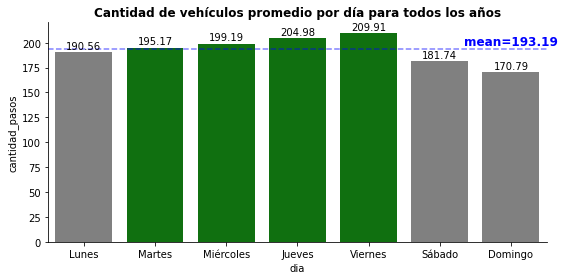

In [24]:
plt.figure(figsize=(8, 4))
pdia_illia_t = dataset_illia_t.groupby(by='dia').agg(
    'mean')[['cantidad_pasos']].reindex(dias_semana)
pdia_illia_t_g = sns.barplot(x=pdia_illia_t.index, y='cantidad_pasos', data=pdia_illia_t,
                              palette=['grey' if (x < pdia_illia_t.cantidad_pasos.mean()) else 'green' for x in pdia_illia_t.cantidad_pasos])
plt.xticks(rotation=0, ha='center')
mean_line = plt.axhline(y=pdia_illia_t.cantidad_pasos.mean(),
                        color='b', linestyle='--', alpha=0.5)
plt.text(6, pdia_illia_t.cantidad_pasos.mean()+8, 'mean='+str(round(pdia_illia_t.cantidad_pasos.mean(), 2)),
         fontsize=12, va='center', ha='center', color="b", fontweight='bold')
for p in pdia_illia_t_g.patches:
    pdia_illia_t_g.annotate(format(p.get_height(), ',.2f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 6), textcoords='offset points')
plt.title('Cantidad de vehículos promedio por día para todos los años',
          fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()

Ha diferencia dde la vista general, aqui hay un flujo un poco cambiante, y teniendo un flujo vehicular mayor los dias martes a viernes

### Lapsos del dia

In [25]:
dataset_illia_t['lapso']=dataset_illia_t.apply(lambda row: str(row.fecha.hour)+'-'+str(row.fecha.hour+1), axis=1)

In [26]:
dataset_illia_t.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,lapso
0,Viernes,Centro,Liviano,14,2016-01-01,0-1
1,Viernes,Provincia,Pesado,4,2016-01-01,0-1
2,Viernes,Provincia,Liviano,385,2016-01-01,0-1
3,Viernes,Provincia,Liviano,8,2016-01-01,0-1
4,Viernes,Centro,Liviano,649,2016-01-01,0-1


In [27]:
order_lapsos = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
                '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17',
                '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24',
                ]

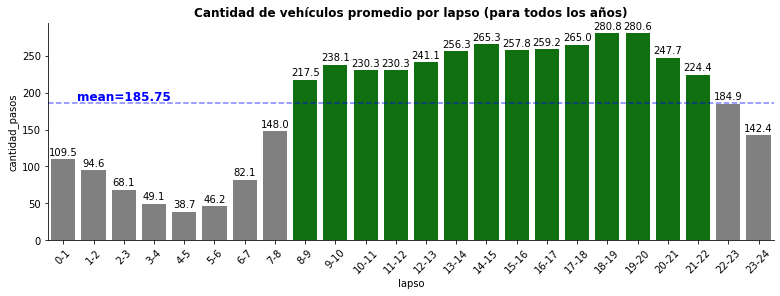

In [28]:
plt.figure(figsize=(13, 4))
pasos_horas_i_t = dataset_illia_t.groupby(
    by='lapso').agg('mean').reindex(order_lapsos)
pasos_horas_i_t_g = sns.barplot(x=pasos_horas_i_t.index, y='cantidad_pasos', data=pasos_horas_i_t, palette=[
                                 'grey' if (x < pasos_horas_i_t.cantidad_pasos.mean()) else 'green' for x in pasos_horas_i_t.cantidad_pasos])
plt.xticks(rotation=45, ha='center')
for p in pasos_horas_i_t_g.patches:
    pasos_horas_i_t_g.annotate(format(p.get_height(), ',.1f'),
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
mean_line_2 = plt.axhline(y=pasos_horas_i_t.cantidad_pasos.mean(),
                          color='b', linestyle='--', alpha=0.5)
plt.text(2, pasos_horas_i_t.cantidad_pasos.mean()+8, 'mean='+str(round(pasos_horas_i_t.cantidad_pasos.mean(), 2)),
         fontsize=12, va='center', ha='center', color="b", fontweight='bold')
plt.title('Cantidad de vehículos promedio por lapso (para todos los años)',
          fontweight='bold')
sns.despine()
plt.show()

Como en la observacion general la franja horaria  de 18 - 19 H es la mas concuridda, pero en Illia esta muy seguida por 19-20h, addemas desddde las 8-22 H el flujo vehoicular supera al promedio

## Series

#### Frecuencia diaria

In [29]:
diario = dataset_illia_t.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 1)


,cantidad_pasos
fecha,
2016-01-01,25602
2016-01-02,36136
2016-01-03,37225
2016-01-04,50312
2016-01-05,49907


In [30]:

diario.isna().sum()

cantidad_pasos    0
dtype: int64

In [31]:
diario.index.to_series().diff().value_counts()

1 days    1460
Name: fecha, dtype: int64

### Detecion de outliers

In [32]:
def IQR(dataset):
    IQR = np.quantile(dataset.cantidad_pasos,0.75)-np.quantile(dataset.cantidad_pasos,0.25)
    limite_sup = np.quantile(dataset.cantidad_pasos,0.75) + 1.5*IQR
    limite_inf = np.quantile(dataset.cantidad_pasos,0.25) - 1.5*IQR
    return {'IQR':IQR, 'limite_sup':limite_sup, 'limite_inf':limite_inf}

In [33]:
results_iqr_diario = IQR(diario)
IQR_diario = results_iqr_diario['IQR']
limite_sup_diario = results_iqr_diario['limite_sup']
limite_inf_diario = results_iqr_diario['limite_inf']

In [34]:
results_iqr_diario

{'IQR': 13141.0, 'limite_sup': 72521.5, 'limite_inf': 19957.5}

In [35]:

print('Cantidad de puntos por encima del límite superior:',diario[diario.cantidad_pasos>limite_sup_diario].shape[0])
print('Cantidad de puntos por debajo del límite inferior:',diario[diario.cantidad_pasos<limite_inf_diario].shape[0])

Cantidad de puntos por encima del límite superior: 0
Cantidad de puntos por debajo del límite inferior: 8


In [36]:
diario[diario.cantidad_pasos<limite_inf_diario]

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-29,19728
2018-11-30,0
2018-12-01,350
2019-01-13,18076
2019-05-29,0


In [37]:
#10 días de mayor flujo vehicular
diario.sort_values(by='cantidad_pasos',ascending=False).head(10)

,cantidad_pasos
fecha,
2016-12-16,70203
2016-12-02,68158
2016-11-11,68121
2016-11-25,67836
2016-12-07,67835
2016-12-22,66715
2016-12-21,66673
2016-12-19,66649
2016-10-21,66244


In [38]:

#10 días de menor flujo vehicular
diario.sort_values(by='cantidad_pasos',ascending=True).head(10)

,cantidad_pasos
fecha,
2019-05-29,0
2018-11-30,0
2018-09-25,0
2018-06-25,0
2017-04-06,40
2018-12-01,350
2019-01-13,18076
2018-11-29,19728
2019-12-01,20553


El dia 16-12-1026 fue el dia on mayor flujo vehicular. tambien extrañamente hay valores en los idas con menor flujo cehicular en 0, esto puedde ser dado por ddaño en los medidores, protestas, o reparacion de la via

In [39]:
dates_picos_inf = diario[diario.cantidad_pasos < limite_inf_diario].reset_index()['fecha'].dt.date
dates_picos_inf

0    2017-04-06
1    2018-06-25
2    2018-09-25
3    2018-11-29
4    2018-11-30
5    2018-12-01
6    2019-01-13
7    2019-05-29
Name: fecha, dtype: object

In [40]:
#Retomando la data de todos los años para tener todos los metodos de pago en Illia:
#Filtramos la estación Illia
mascara_2 = dataset_all.estacion=='Illia'
dataset_illia = dataset_all[mascara_2].copy()

#dropeamos columnas que no se usarán
dataset_illia.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y añadimos hora_fin como la hora de esa fecha.
dataset_illia['fecha_2'] = pd.to_datetime(dataset_illia.fecha) + pd.to_timedelta(dataset_illia.hora_fin, unit = 'h')

#Dropeamos las columnas de fecha y hora fin, además cambiamos el nombre a la nueva fecha creada
dataset_illia.drop(columns=['fecha','hora_fin'],inplace=True)
dataset_illia.rename(columns = {'fecha_2':'fecha'},inplace=True)
dataset_illia.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
1690,Viernes,Centro,Liviano,NO COBRADO,156,2016-01-01 01:00:00
1691,Viernes,Centro,Liviano,AUPASS,57,2016-01-01 01:00:00
1692,Viernes,Centro,Liviano,NO COBRADO,763,2016-01-01 02:00:00
1693,Viernes,Centro,Liviano,AUPASS,287,2016-01-01 02:00:00
1694,Viernes,Centro,Pesado,AUPASS,3,2016-01-01 02:00:00


In [41]:
#Extraemos solo la fecha para poder filtrar luego
dataset_illia['date'] = dataset_illia['fecha'].dt.date

In [42]:
dataset_illia.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha,date
1690,Viernes,Centro,Liviano,NO COBRADO,156,2016-01-01 01:00:00,2016-01-01
1691,Viernes,Centro,Liviano,AUPASS,57,2016-01-01 01:00:00,2016-01-01
1692,Viernes,Centro,Liviano,NO COBRADO,763,2016-01-01 02:00:00,2016-01-01
1693,Viernes,Centro,Liviano,AUPASS,287,2016-01-01 02:00:00,2016-01-01
1694,Viernes,Centro,Pesado,AUPASS,3,2016-01-01 02:00:00,2016-01-01


In [43]:
#Extraemos las entradas paras las 8 fechas catalogadas como Outliers:
data_outliers_diarios = dataset_illia[dataset_illia['date'].isin(dates_picos_inf)]

In [44]:
#Agrupamos por date y ordenamos según el orden ascendente de los pagos en efectivo.
data_outliers_diarios.groupby(['date','forma_pago']).sum().reindex(dates_picos_inf, level=0)

cantidad_pasos
date       forma_pago                          
2017-04-06 EFECTIVO                          40
           EXENTO                             1
           NO COBRADO                     45961
           TELEPASE                       19296
2018-06-25 NO COBRADO                     85099
2018-09-25 NO COBRADO                     78690
2018-11-29 EFECTIVO                       19728
           EXENTO                           449
           INFRACCION                       224
           NO COBRADO                      1108
           TARJETA DISCAPACIDAD             169
           TELEPASE                       26260
2018-11-30 NO COBRADO                       387
2018-12-01 EFECTIVO                         350
           EXENTO                             9
           INFRACCION                         5
           NO COBRADO                       464
           TARJETA DISCAPACIDAD               3
           TELEPASE                         290
2019-01-13 EFECTIVO                       18076
           EXENTO                           144
           INFRACCION                       154
           NO COBRADO                      2027
           T. DISCAPACIDAD                  154
           TELEPASE                       12974
2019-05-29 NO COBRADO                     87419

In [45]:
#Sumamos todos los registros que no sean forma_pago = EFECTIVO
data_outliers_diarios[data_outliers_diarios['forma_pago'] != 'EFECTIVO'].groupby('date').sum().reindex(dates_picos_inf)

,cantidad_pasos
fecha,
2017-04-06,65258
2018-06-25,85099
2018-09-25,78690
2018-11-29,28210
2018-11-30,387
2018-12-01,771
2019-01-13,15453
2019-05-29,87419


Se puede analizar que hay muchos valores en la categoria No ccobrados, lo que puede generar muchas preguntas, es posible que estos dias se hayan presentado manifestaciones o ccelebraccciones naccionales multitudinarias que no permitieron el recaudo

## Eliminacion de outlier

In [46]:

dates_picos_inf

0    2017-04-06
1    2018-06-25
2    2018-09-25
3    2018-11-29
4    2018-11-30
5    2018-12-01
6    2019-01-13
7    2019-05-29
Name: fecha, dtype: object

In [47]:
# Cambio el formato de los indices para eliminar las horas (ya que son fechas de días completos)
diario_dates_format = diario.copy()
diario_dates_format.index = diario_dates_format.index.date
diario_dates_format[diario_dates_format.index.isin(dates_picos_inf)] = np.NaN
# Genero filtro de atípicos y le asigno NaN

In [48]:
diario_dates_format[diario_dates_format.index.isin(dates_picos_inf)] = np.NaN
diario_dates_format[diario_dates_format.index.isin(dates_picos_inf)]


,cantidad_pasos
2017-04-06,NaN
2018-06-25,NaN
2018-09-25,NaN
2018-11-29,NaN
2018-11-30,NaN
2018-12-01,NaN
2019-01-13,NaN
2019-05-29,NaN


Dado la ccantidad pequeña de datos outliers y la necesidad de tener un dataset preparado para un modelo, no se eliminan los valores y se remplazan

In [49]:

#Verificamos que los NaN sean las 8 fechas Outliers
diario_dates_format.isna().sum()

cantidad_pasos    8
dtype: int64

In [50]:
#Reemplazamos usando interpolación
diario_dates_format = diario_dates_format.interpolate()
#Miramos las fechas reemplazadas
diario_dates_format[diario_dates_format.index.isin(dates_picos_inf)]

,cantidad_pasos
2017-04-06,55537.00
2018-06-25,38312.50
2018-09-25,41299.50
2018-11-29,40311.75
2018-11-30,36899.50
2018-12-01,33487.25
2019-01-13,37122.00
2019-05-29,40353.50


## Autororrelaccion

In [51]:
def plot_autoc(period, years, data):
    '''Función para graficar la autocorrelación en una serie de tiempo.
    Recibe como argumento el tipo de periodo de tiempo que se maneja (day,week o month),
    los años que se quieren graficar y el dataset respectivo'''
    days=365
    weeks=52
    months=12
    if period=='day':
        nlags= days*years
    elif period=='week':
        nlags= weeks*years
    elif period=='month':
        nlags= months*years
    autocorr = acf(data, nlags= nlags, fft=False)
    # Plot Autorcorrelación
    fig, ax = plt.subplots(2,1,figsize=(15,12))
    ax[0].scatter(np.arange(nlags+1), autocorr)
    ax[0].set_xlabel('lag')
    ax[0].grid()
    plot_acf(data, lags = np.arange(nlags), ax=ax[1], vlines_kwargs={"colors": 'black'})
    ax[1].set_xlabel('lag')
    plt.tight_layout()
    plt.show()

## 1 año

En los soguientes graficos el intervalo de cconfianza es del 95%, estos se dibujan ccomo un cono, los valores fuera de la ccorrelaccion son probablemente una correlacion y no una casualiddad estadistica

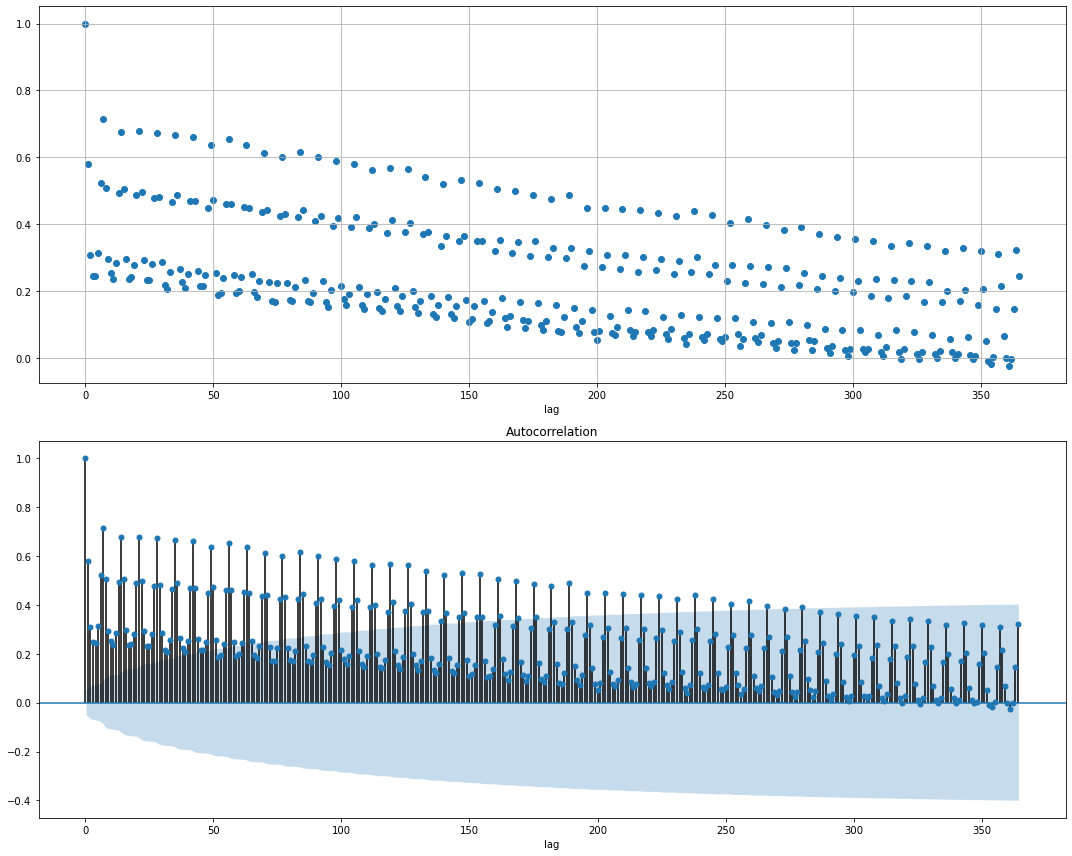

In [52]:
plot_autoc('day',1,diario_dates_format)

## 2 Años

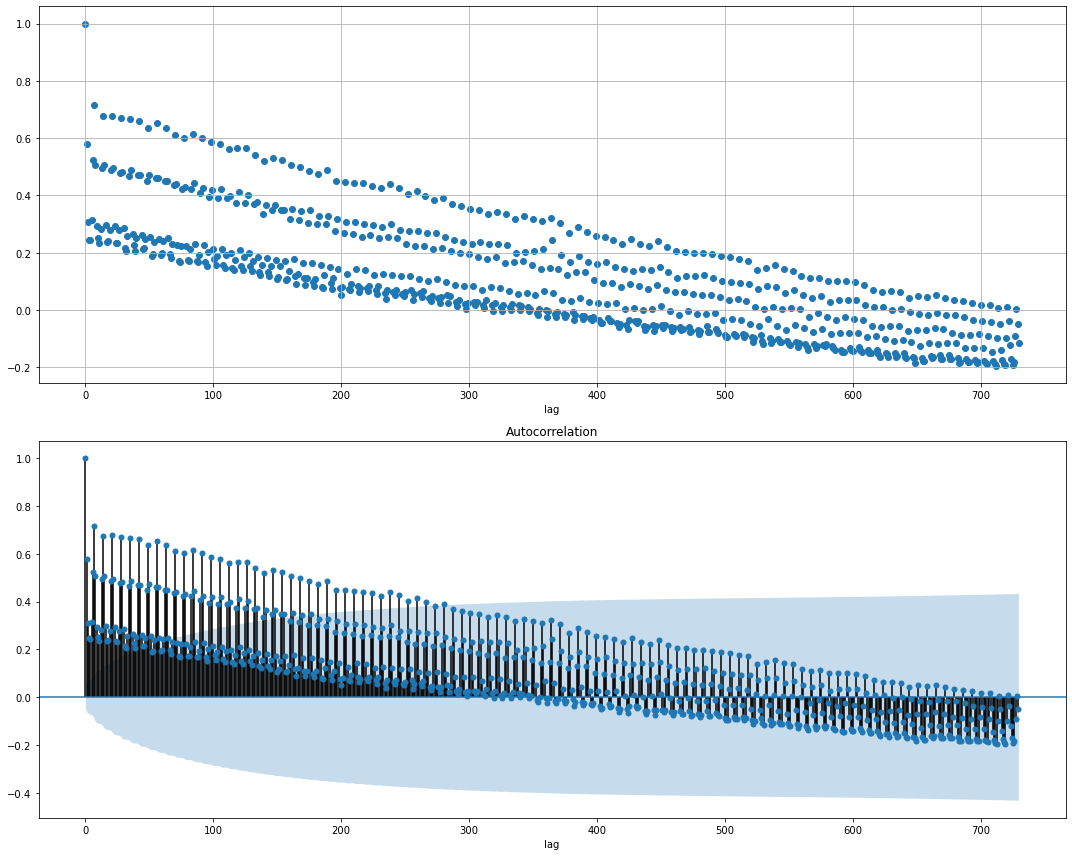

In [53]:

plot_autoc('day',2,diario_dates_format)

## 3 años

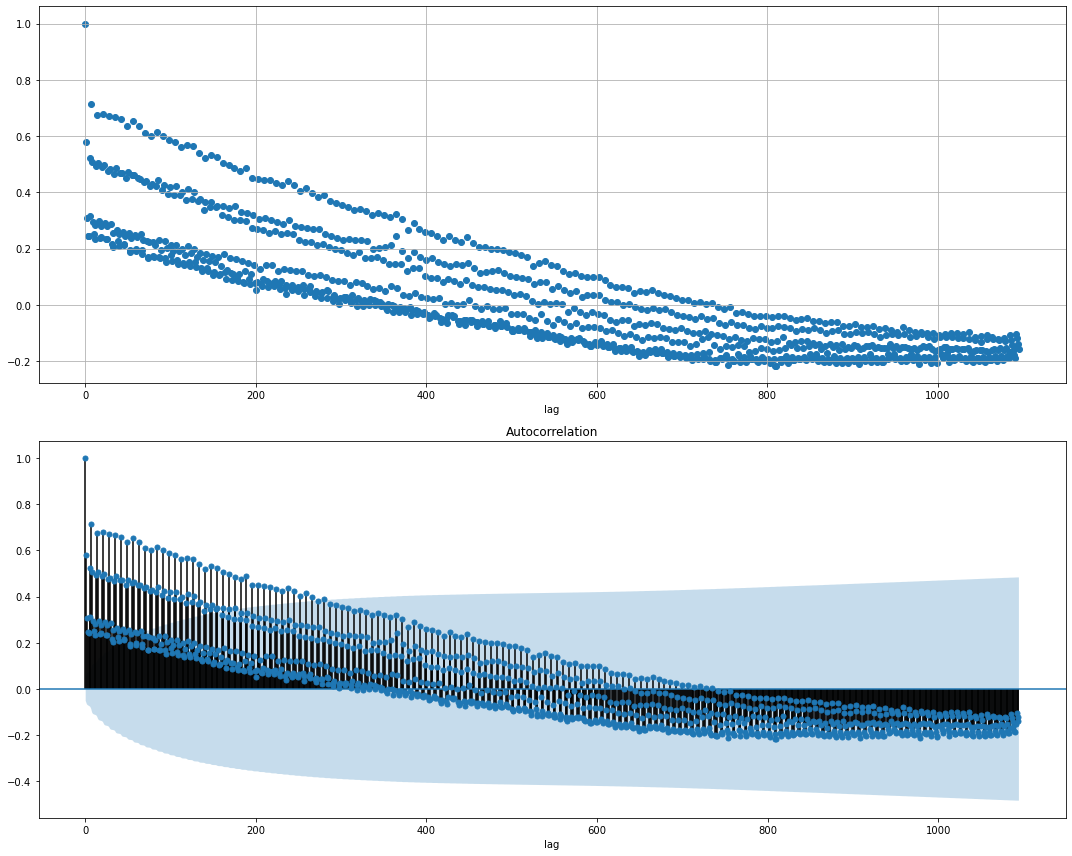

In [54]:
plot_autoc('day',3,diario_dates_format)

## 4 Años

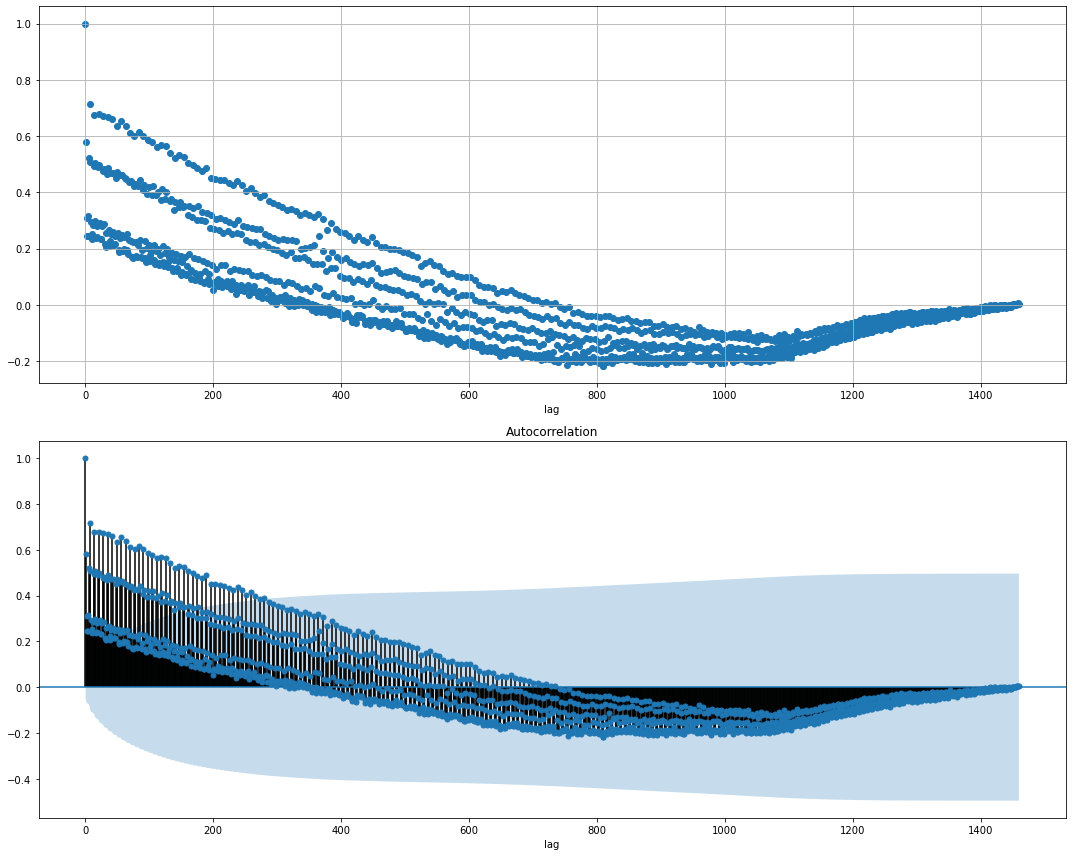

In [55]:
plot_autoc('day',4,diario_dates_format)

### Descompoccion de la serie 

In [56]:
#Verificamos de qué tipo son los índices
print(type(diario.index))
print(type(diario_dates_format.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.base.Index'>


In [57]:

diario['cantidad_pasos'] = diario_dates_format['cantidad_pasos']

In [58]:
#Calculamos la decomposición aditiva
additive_result = seasonal_decompose(diario.cantidad_pasos, model='additive', extrapolate_trend='freq')
#Calculamos la decomposición multiplicativa
mult_result = seasonal_decompose(diario.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

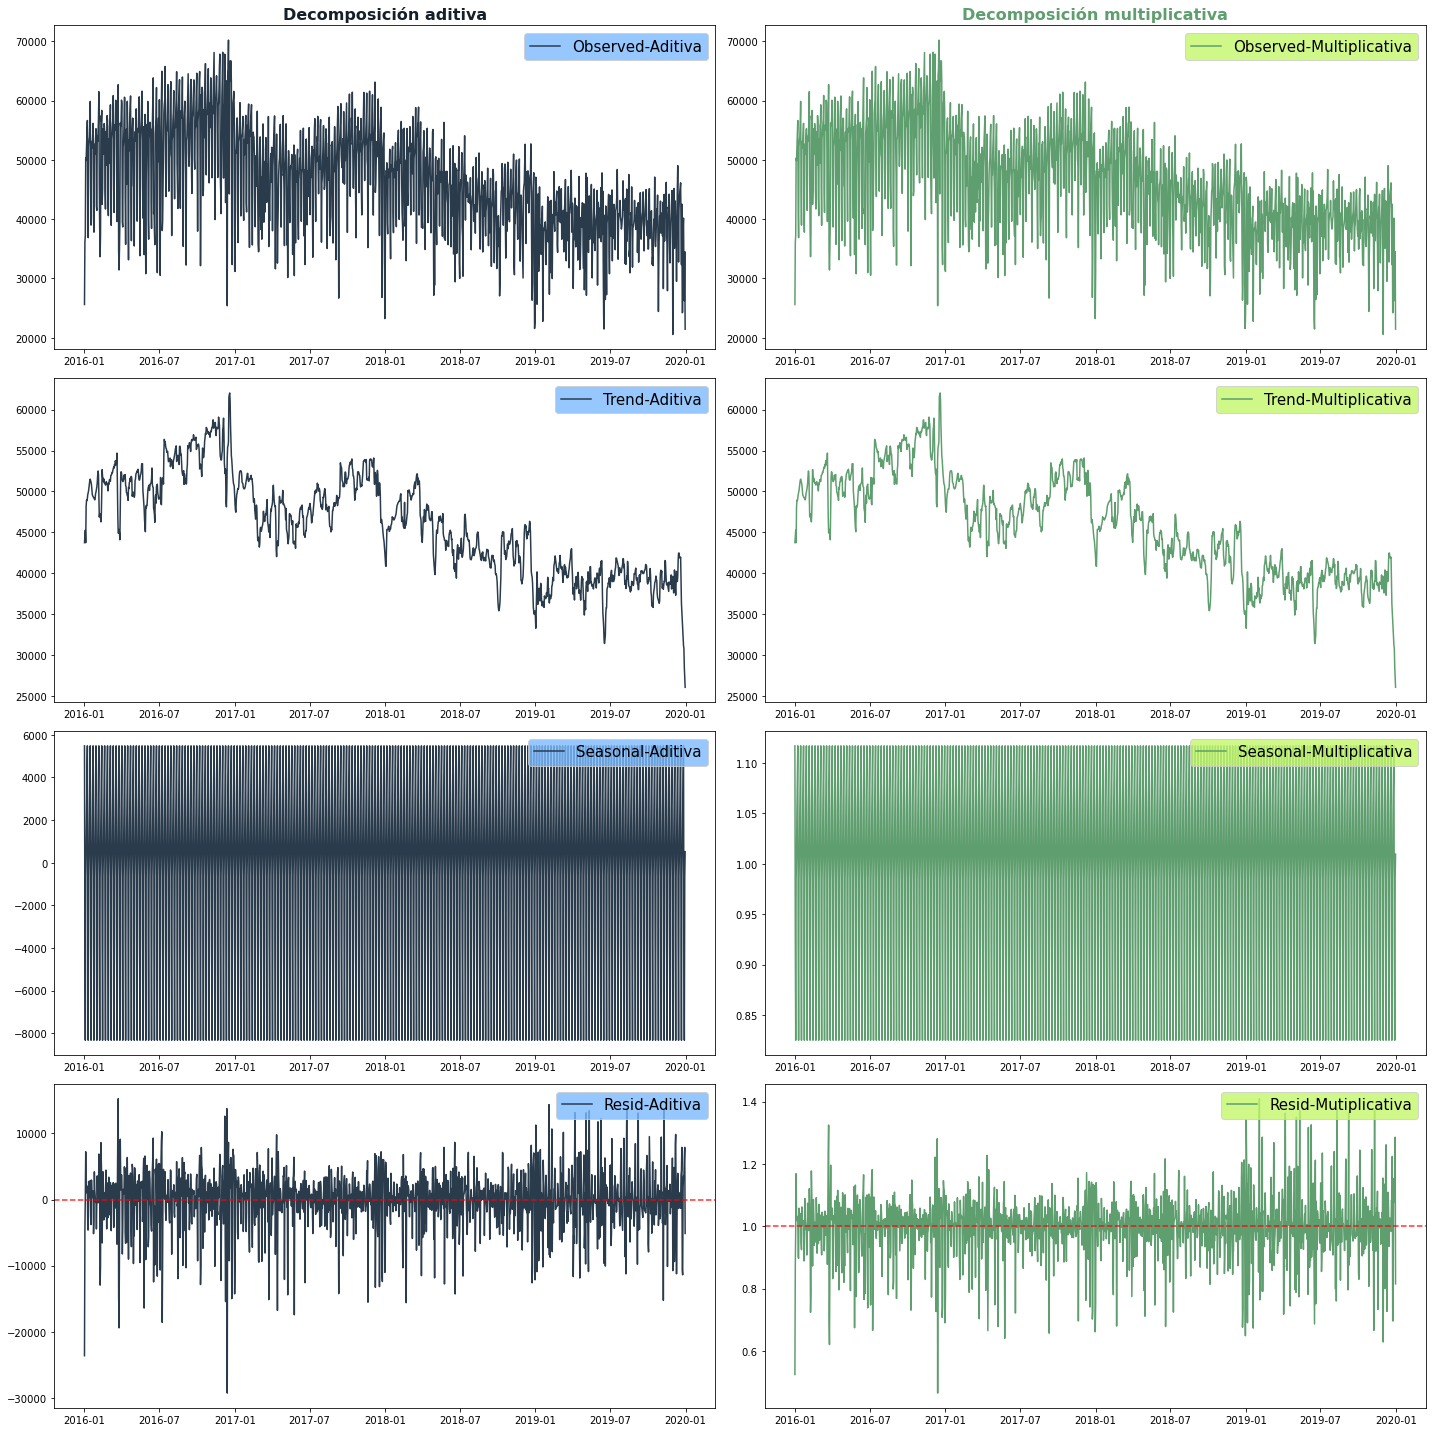

In [59]:
#Graficamos ambos casos para comparar

color_a='#2a3b4c'
color_m='#5f9e6e'

plt.figure(figsize=(20,20))
plt.subplot(421)
plt.title('Decomposición aditiva', fontweight='bold', fontsize=16, color='#15202b')
plt.plot(additive_result.observed, color=color_a, label= "Observed-Aditiva")
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(422)
plt.title('Decomposición multiplicativa', fontweight='bold', fontsize=16, color=color_m)
plt.plot(mult_result.observed, color=color_m, label= "Observed-Multiplicativa")
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.subplot(423)
plt.plot(additive_result.trend, color=color_a, label= "Trend-Aditiva")
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(424)
plt.plot(mult_result.trend, color=color_m, label= "Trend-Multiplicativa")
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.subplot(425)
plt.plot(additive_result.seasonal, color=color_a, label= "Seasonal-Aditiva")
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(426)
plt.plot(mult_result.seasonal, color=color_m, label= "Seasonal-Multiplicativa")
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.subplot(427)
plt.plot(additive_result.resid, color=color_a, label= "Resid-Aditiva")
plt.axhline(y=additive_result.resid.mean(), color='red', linestyle='--', alpha=0.8)
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(428)
plt.plot(mult_result.resid, color=color_m, label= "Resid-Mutiplicativa")
plt.axhline(y=mult_result.resid.mean(), color='red', linestyle='--', alpha=0.8)
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.tight_layout()
plt.show()

## Frecuencia semanal

In [60]:
semanal = diario.resample('W').sum()
print(semanal.shape)
semanal.head()

(210, 1)


,cantidad_pasos
fecha,
2016-01-03,98963.0
2016-01-10,342201.0
2016-01-17,359649.0
2016-01-24,346217.0
2016-01-31,348221.0


In [61]:
semanal.isna().sum()

cantidad_pasos    0
dtype: int64

In [62]:

semanal.index.to_series().diff().value_counts()

7 days    209
Name: fecha, dtype: int64

##  Detección y eliminación de outliers (semanal)

In [63]:
results_iqr_semanal = IQR(semanal)
IQR_semanal = results_iqr_semanal['IQR']
limite_sup_semanal = results_iqr_semanal['limite_sup']
limite_inf_semanal = results_iqr_semanal['limite_inf']
print(results_iqr_semanal)
print('Cantidad de puntos por encima del límite superior:',semanal[semanal.cantidad_pasos>limite_sup_semanal].shape[0])
print('Cantidad de puntos por debajo del límite inferior:',semanal[semanal.cantidad_pasos<limite_inf_semanal].shape[0])

{'IQR': 70969.75, 'limite_sup': 463452.125, 'limite_inf': 179573.125}
Cantidad de puntos por encima del límite superior: 0
Cantidad de puntos por debajo del límite inferior: 2


In [64]:
semanal[semanal.cantidad_pasos<limite_inf_semanal]

,cantidad_pasos
fecha,
2016-01-03,98963.0
2020-01-05,55970.0


In [65]:

semanal = diario.resample('W').mean()
print(semanal.shape)
semanal.head()

(210, 1)


,cantidad_pasos
fecha,
2016-01-03,32987.666667
2016-01-10,48885.857143
2016-01-17,51378.428571
2016-01-24,49459.571429
2016-01-31,49745.857143


In [66]:
results_iqr_semanal = IQR(semanal)
IQR_semanal = results_iqr_semanal['IQR']
limite_sup_semanal = results_iqr_semanal['limite_sup']
limite_inf_semanal = results_iqr_semanal['limite_inf']
print(results_iqr_semanal)
print('Cantidad de puntos por encima del límite superior:',semanal[semanal.cantidad_pasos>limite_sup_semanal].shape[0])
print('Cantidad de puntos por debajo del límite inferior:',semanal[semanal.cantidad_pasos<limite_inf_semanal].shape[0])


{'IQR': 10138.535714285717, 'limite_sup': 66207.44642857143, 'limite_inf': 25653.30357142857}
Cantidad de puntos por encima del límite superior: 0
Cantidad de puntos por debajo del límite inferior: 0


## Autocorrelación (semanal)¶

##  1 año

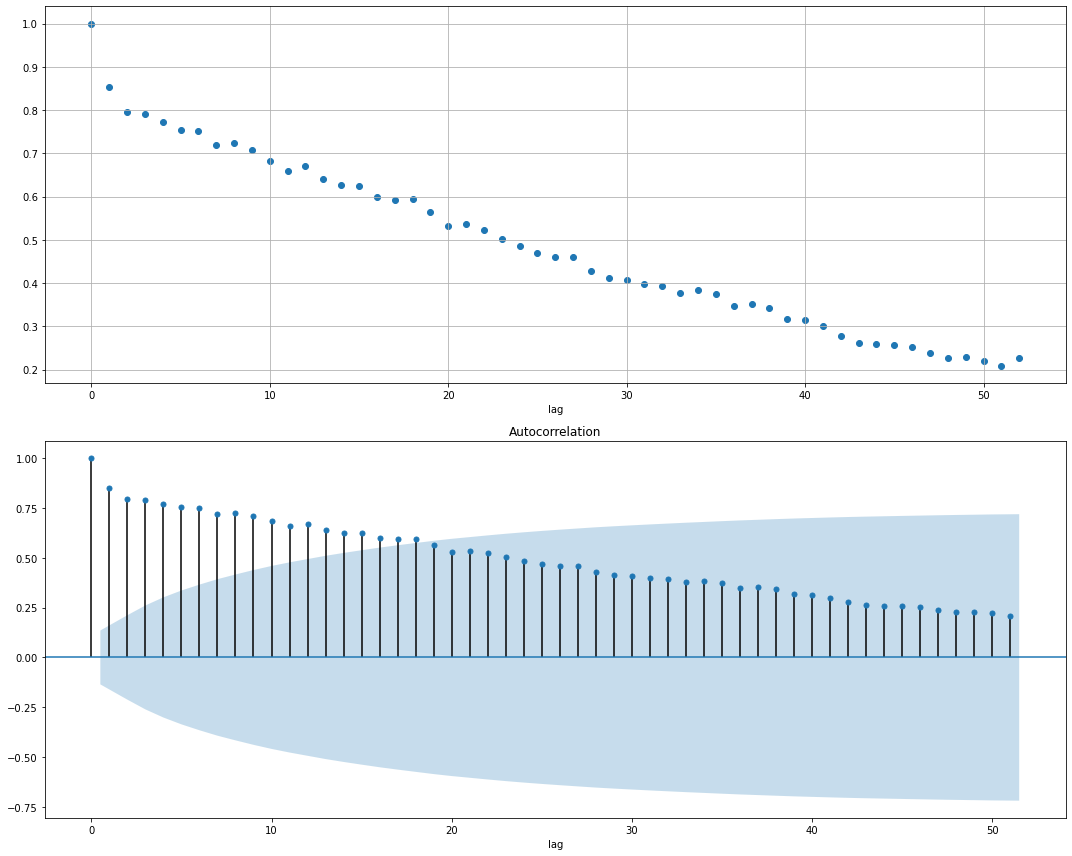

In [67]:
plot_autoc('week',1,semanal)

## 2 año

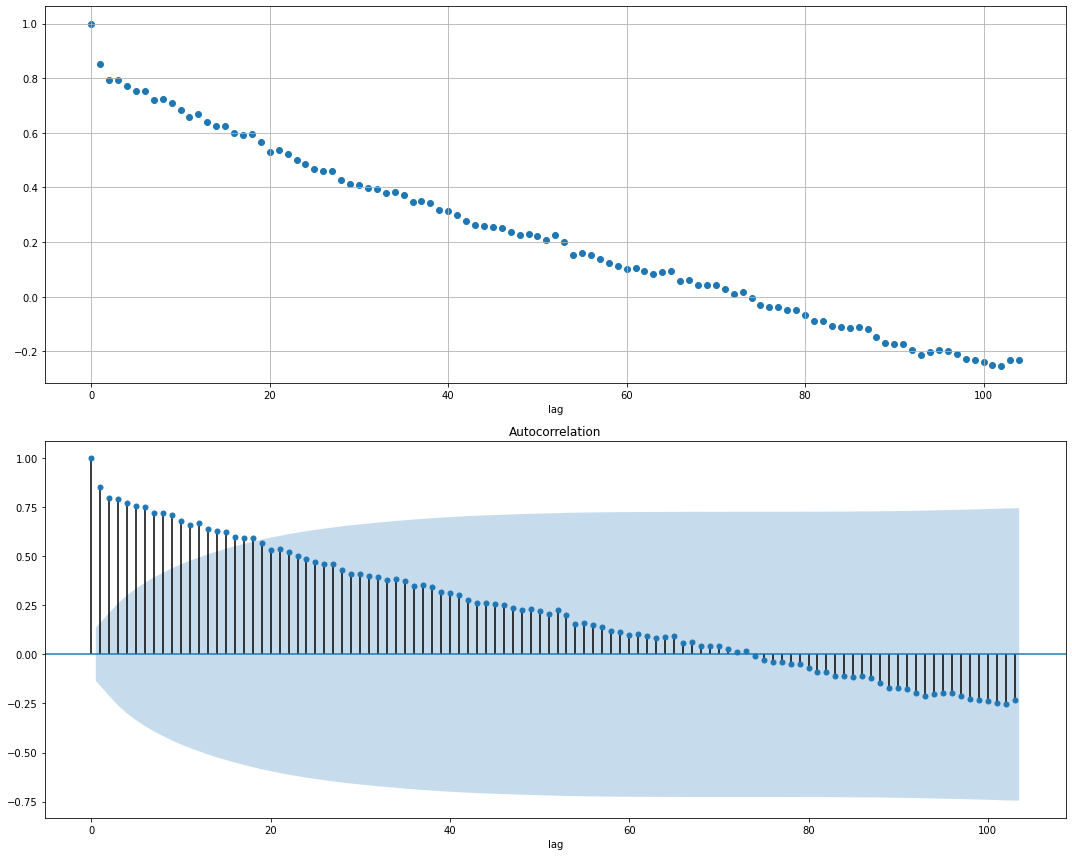

In [68]:
plot_autoc('week',2,semanal)

## 3 año

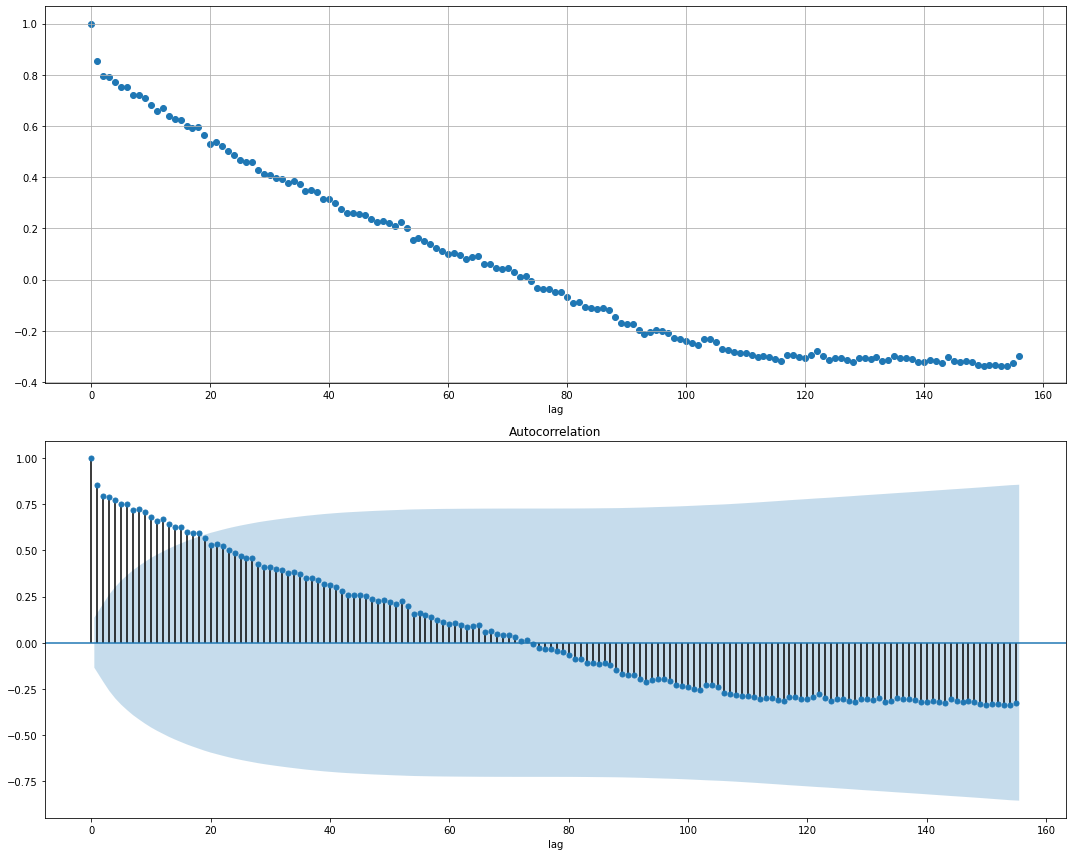

In [69]:
plot_autoc('week',3,semanal)

## 4 año

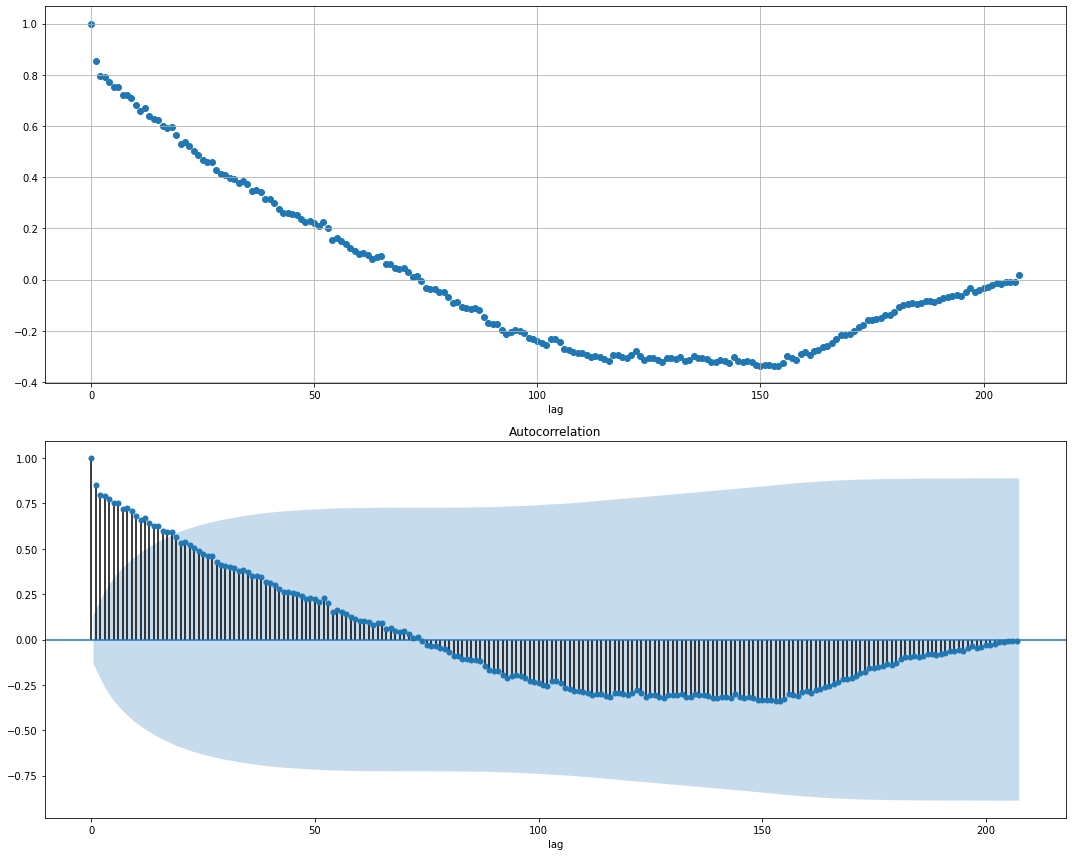

In [70]:
plot_autoc('week',4,semanal)

* Se observa un mejor comportamiento en la franja mensual, asi que se utilizará para realizar el modelo de prediccion
* Los medios de pago mas usuales son el efectivo y la tarjeta telepase


## Modelo

* Se realizará un modelo de prediccion para el ultimo trimestre del 2019 en la autopista Illia, se partirá la data en seccion de entrenamiento y seccion de testeo, para poder determinar si el modelo presenta un comportamiento "real".

*  La metrica usada sera el RMSE


# Modelo benchmark

In [71]:
model = Prophet(weekly_seasonality=True)
data_prophet = semanal.reset_index().rename(columns={'fecha':'ds','cantidad_pasos':'y'}).copy()
#Verificamos los dtypes
data_prophet.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [72]:
data_prophet.head()

,ds,y
0,2016-01-03,32987.666667
1,2016-01-10,48885.857143
2,2016-01-17,51378.428571
3,2016-01-24,49459.571429
4,2016-01-31,49745.857143


In [73]:
data_prophet_train = data_prophet[data_prophet.ds<'2019-10-01']

In [74]:

model.fit(data_prophet_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
future = model.make_future_dataframe(periods=14, freq='W')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-03,37574.399735,44536.721523,50809.845719,37574.399735,37574.399735,9910.477306,9910.477306,9910.477306,13865.312511,13865.312511,13865.312511,-3954.835205,-3954.835205,-3954.835205,0.0,0.0,0.0,47484.877041
1,2016-01-10,37601.496466,43752.925140,50333.569394,37601.496466,37601.496466,9548.797317,9548.797317,9548.797317,13865.312511,13865.312511,13865.312511,-4316.515194,-4316.515194,-4316.515194,0.0,0.0,0.0,47150.293783
2,2016-01-17,37628.593197,45698.731644,51929.754666,37628.593197,37628.593197,11130.561588,11130.561588,11130.561588,13865.312511,13865.312511,13865.312511,-2734.750923,-2734.750923,-2734.750923,0.0,0.0,0.0,48759.154785
3,2016-01-24,37655.689928,47081.898685,54034.314401,37655.689928,37655.689928,12991.571424,12991.571424,12991.571424,13865.312511,13865.312511,13865.312511,-873.741087,-873.741087,-873.741087,0.0,0.0,0.0,50647.261352
4,2016-01-31,37682.786659,47913.842205,54692.024785,37682.786659,37682.786659,13724.203925,13724.203925,13724.203925,13865.312511,13865.312511,13865.312511,-141.108586,-141.108586,-141.108586,0.0,0.0,0.0,51406.990584


In [76]:
y_test_pred_prophet=forecast[forecast.ds>='2019-10-01'].yhat
y_train_pred_prophet=forecast[(forecast.ds<'2019-10-01')&(forecast.ds>'2016-03-30')].yhat

In [77]:
y_test_prophet=semanal[semanal.index>='2019-10-01'].iloc[:]
y_train_prophet=semanal[(semanal.index<'2019-10-01')&(semanal.index>'2016-03-30')].iloc[:]

In [78]:
MSE_train_prophet = mean_squared_error(y_train_prophet.values, y_train_pred_prophet.values)
print('Error en Train:',np.sqrt(MSE_train_prophet))
MSE_test_prophet = mean_squared_error(y_test_prophet.values, y_test_pred_prophet.values)
print('Error en Test:',np.sqrt(MSE_test_prophet))

Error en Train: 2338.009340289245
Error en Test: 2409.56322148152


## Modelo propuesto

In [79]:
look_back=12 
N = semanal.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(197, 12) (197,)


In [80]:
for i in range(X.shape[0]):
    #Usamos squeeze para convertir nuestro DataFrame a Serie
    X[i,:] = semanal.squeeze().iloc[i:i+look_back]
    y[i] = semanal.squeeze().iloc[i+look_back]

In [81]:
N_train = X.shape[0] - look_back # cantidad de semanas que vamos a usar para entrenar. 
N_test = 12 #cantidad de semanas que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(185, 12) (185,)
(12, 12) (12,)


In [82]:
r_forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4)

In [83]:
r_forest.fit(X_train,y_train)

RandomForestRegressor(n_jobs=4, random_state=42)

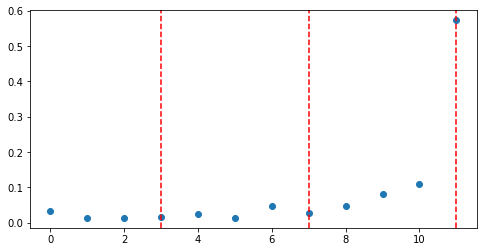

In [84]:
plt.figure(figsize = (8,4))
plt.scatter(np.arange(r_forest.feature_importances_.size),r_forest.feature_importances_)
for x in (3,7,11): #Semanas finales del mes (en el trimestre)
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [85]:
y_pred_rf = r_forest.predict(X)
y_train_pred_rf = r_forest.predict(X_train)
y_test_pred_rf = r_forest.predict(X_test)

In [86]:
def plot_prediction_results(y_train_pred,y_test_pred):
    plt.figure(figsize=(15,6))
    plt.plot(semanal.index[:length_total], semanal[:length_total],lw = 0.75, label = 'Serie Original')
    plt.plot(semanal.index[:N_train + look_back], semanal[:N_train + look_back],'--', label = 'Usado para entrenar')
    plt.plot(semanal.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
    plt.plot(semanal.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
    plt.legend()
    plt.xlabel('Tiempo')
    plt.ylabel('Cantidad de pasos')
    plt.show()

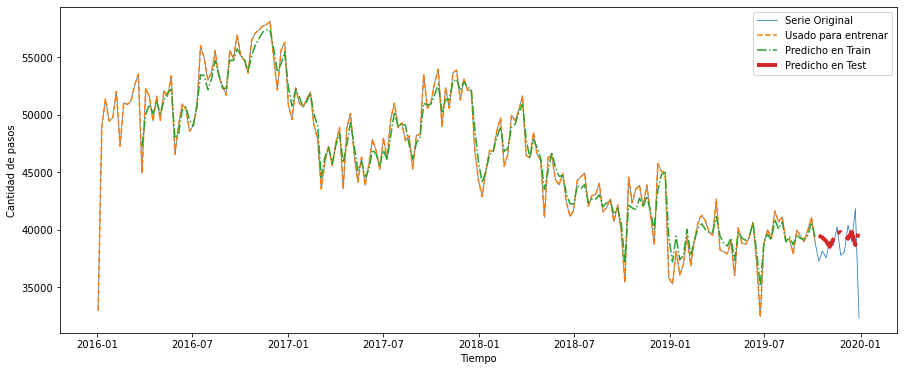

In [87]:
plot_prediction_results(y_train_pred_rf,y_test_pred_rf)

In [88]:
print('RMSE en Train:',np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('RMSE en Test:',np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

RMSE en Train: 977.1888404089059
RMSE en Test: 2664.110265143856


Mejoramiemnto de Hipeparametros

In [89]:

params_grid_rf = {
    "n_estimators":[150,300,450],
    "criterion":["mse"],
    "max_depth":[None],
    "bootstrap":[True,False]
}

In [90]:
model_rf = GridSearchCV(r_forest, param_grid=params_grid_rf, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')

In [91]:
model_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=4, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
                         'max_depth': [None], 'n_estimators': [150, 300, 450]},
             scoring='neg_mean_squared_error')

In [92]:
print("Mejores parametros: "+str(model_rf.best_params_))
print("Mejor Score: "+str(model_rf.best_score_))

scores_fg = pd.DataFrame(model_rf.cv_results_)
scores_fg.sort_values(by="mean_test_score",ascending=False).head()# 5 mejores modelos

Mejores parametros: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'n_estimators': 150}
Mejor Score: -8290313.17812113


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.484759,0.016976,0.104808,0.001851,True,mse,None,150,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",-1.240462e+07,-6.629907e+06,-7.145542e+06,-1.118306e+07,-4.088441e+06,-8.290313e+06,3.066550e+06,1
2,1.852561,0.256086,0.103381,0.000816,True,mse,None,450,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",-1.249206e+07,-6.246514e+06,-7.170647e+06,-1.120357e+07,-4.364668e+06,-8.295492e+06,3.065389e+06,2
1,1.157577,0.052019,0.103059,0.000784,True,mse,None,300,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",-1.263981e+07,-6.396231e+06,-7.230428e+06,-1.138951e+07,-4.310122e+06,-8.393221e+06,3.131231e+06,3
3,0.451608,0.099289,0.104052,0.001517,False,mse,None,150,"{'bootstrap': False, 'criterion': 'mse', 'max_...",-1.738571e+07,-1.451708e+07,-1.179219e+07,-1.205678e+07,-3.666987e+07,-1.848433e+07,9.314056e+06,4
5,1.122015,0.218501,0.105093,0.001237,False,mse,None,450,"{'bootstrap': False, 'criterion': 'mse', 'max_...",-1.731330e+07,-1.460292e+07,-1.180607e+07,-1.220235e+07,-3.672451e+07,-1.852983e+07,9.307983e+06,5


In [93]:
r_forest_2 = RandomForestRegressor(random_state=42,n_estimators=150,criterion='mse',max_depth=None,bootstrap='True')
r_forest_2.fit(X_train,y_train)

RandomForestRegressor(bootstrap='True', n_estimators=150, random_state=42)

In [94]:
y_train_pred_rf2 = r_forest_2.predict(X_train)
y_test_pred_rf2 = r_forest_2.predict(X_test)
print('RMSE en Train:',np.sqrt(mean_squared_error(y_train, y_train_pred_rf2)))
print('RMSE en Test:',np.sqrt(mean_squared_error(y_test, y_test_pred_rf2)))

RMSE en Train: 977.57112800637
RMSE en Test: 2651.667783570782


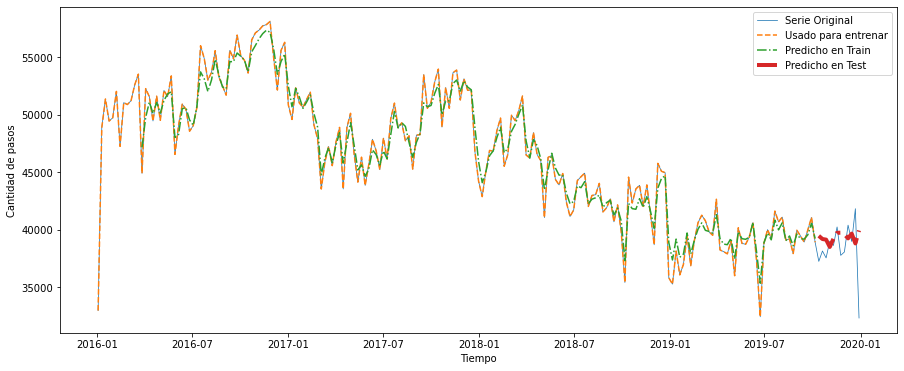

In [95]:
plot_prediction_results(y_train_pred_rf2,y_test_pred_rf2)

## Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
2. Incorporar información adicional para las predicciones serviria mucho para mejorar las predicciones debido a que es información sobre la influencia relacionada con el comportamiento de la serie, de esta manera, para incluirla se debe tener en cuenta si la variable es numerica o categorica, discreta o continua y realizar las transformaciones pertinentes para poder trabajar con ella.
3. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
* Se espera que el comportamiento del flujo de transito en las distintas estaciones sea diferente, esto debido a que el posicionamiento de algunos peajes influye en el flujo del mismo, ademas algunas reglamentaciones restringen el paso de cierto tipo de vehiculos en determinadas estaciones. Fuente
4. ¿Hay algo que te gustaría investigar o probar?

## Objetivo
Como investigación adicional sobre el presente proyecto, se plantea la realización de predicciones sobre la variable de interes (Flujo Vehicular) empleando alguna de las demas variables disponibles en nuestro dataset o de ser necesario poder incluir información adicional a la disponible para realizar un análisis conjunto con las tarifas de los peajes o al precio del combustible en los mismos periodos de tiempo, de manera que puedan extraerse relaciones de causa-efecto en el comportamiento de la serie, para esto puede ser necesario realizar nuevos resampleos que se ajusten a la frecuencia de esta nueva información.


## Metodología
En primera instancia se realizara una investigación sobre las posibles variables que podamos utilizar dentro de la información disponible, observando el tipo de variable, la importancia de la información que aporta, si es posible trabajar con ella y la frecuencia de esta, en el caso de las variables categoricas debemos realizar la respectiva codificación para pasar a variables numericas y en el caso de variables discretas observar si su frecuencia permite trabajar con la frecuencia actual de predicción o se requiere un resampleo o algun otro ajuste.
En dado caso que se requiera mas información exterior al conjunto de datos disponible podremos consultar las paginas oficiales del gobierno Argentino, por información que creemos util y relacionada con el flujo vehicular como lo es el precio historico del combustible y de los peajes en 'Illia' durante los años correspondientes (Datasets).
Se realiza el respectivo procesamiento de estos conjuntos de datos y su debida integración al conjunto de datos existentes.

## Resultados esperados
Se espera que con la integración de nuevos datos relacionados con el posible comportamiento de la serie, se puedan realizar mejores predicciones al tener mas información sobre la naturaleza de la misma.

## Prueba de investigación
Se realizara una pequeña prueba sobre el desarrollo de la investigación para establecer un paso a paso de como sera el manejo de datos asi como la inclusión de nueva información para realizar predicciones multivariables con Prophet y de esta manera poder realizar trabajos futuros:
Emplearemos una nueva variable disponible en nuestro conjunto de datos para realizar la predicción, el dia de la semana, esta variable se puede extraer de dos maneras, a partir de la columna donde aparece de forma categorica, para lo cual se debe codificar o se puede extraer tambien apartir de la columna fecha con la funcion to_datetime, la cual nos devuelve el dia de la semana en formato numerico:

In [96]:

# Traemos el dataset resampleado por Dias
diap=diario_dates_format.copy()
# Creamos una nueva columna que contendra la fecha de registro
diap['dias']=diap.index
diap['dias']=pd.to_datetime(diap.dias)
# De esta columna extraemos el dia de la semana
diap['dia']=diap.dias.dt.dayofweek
# Eliminamos la columna que ya no se va a usar
diap.drop(columns=['dias'],inplace=True)
# Ajustamos el index para poder trabajar con Prophet
diap.index = pd.to_datetime(diap.index)
diap.index.name = 'fecha'

diap.head(5)

,cantidad_pasos,dia
fecha,,
2016-01-01,25602.0,4
2016-01-02,36136.0,5
2016-01-03,37225.0,6
2016-01-04,50312.0,0
2016-01-05,49907.0,1


## Prophet diario sin información del dia
A continuación realizamos el mismo procedimiento que se ha llevado a cabo para realizar predicciones con Prophet:

In [97]:
diap1=diap.copy()
diap1.drop(columns='dia',inplace=True)

In [98]:
model = Prophet(daily_seasonality=True)
data_prophet = diap1.reset_index().rename(columns={'fecha':'ds','cantidad_pasos':'y'}).copy()
#Verificamos los dtypes
data_prophet.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [99]:
data_prophet.head()

,ds,y
0,2016-01-01,25602.0
1,2016-01-02,36136.0
2,2016-01-03,37225.0
3,2016-01-04,50312.0
4,2016-01-05,49907.0


In [100]:
data_prophet_train = data_prophet[data_prophet.ds<'2019-10-01']

In [101]:
model.fit(data_prophet_train)


In [102]:
data_prophet[-92:-90]

,ds,y
1369,2019-10-01,39669.0
1370,2019-10-02,34943.0


In [103]:
data_prophet.tail(1)

,ds,y
1460,2019-12-31,21447.0


In [104]:
future = model.make_future_dataframe(periods=92, freq='D')

In [105]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,30747.880182,47659.071251,60506.646371,30747.880182,30747.880182,23372.164873,23372.164873,23372.164873,20670.219834,...,5573.248590,5573.248590,5573.248590,-2871.303551,-2871.303551,-2871.303551,0.0,0.0,0.0,54120.045055
1,2016-01-02,30753.553427,38358.822358,50943.148649,30753.553427,30753.553427,13783.235812,13783.235812,13783.235812,20670.219834,...,-3826.591334,-3826.591334,-3826.591334,-3060.392687,-3060.392687,-3060.392687,0.0,0.0,0.0,44536.789239
2,2016-01-03,30759.226672,33173.958219,45711.264231,30759.226672,30759.226672,8869.235625,8869.235625,8869.235625,20670.219834,...,-8591.746264,-8591.746264,-8591.746264,-3209.237944,-3209.237944,-3209.237944,0.0,0.0,0.0,39628.462297
3,2016-01-04,30764.899916,40399.615168,53803.535567,30764.899916,30764.899916,16689.574623,16689.574623,16689.574623,20670.219834,...,-663.360579,-663.360579,-663.360579,-3317.284631,-3317.284631,-3317.284631,0.0,0.0,0.0,47454.474540
4,2016-01-05,30770.573161,42294.547067,55177.469935,30770.573161,30770.573161,17926.131340,17926.131340,17926.131340,20670.219834,...,640.624706,640.624706,640.624706,-3384.713200,-3384.713200,-3384.713200,0.0,0.0,0.0,48696.704501


In [106]:

y_test_pred_prophet=forecast[forecast.ds>='2019-10-01'].yhat
y_train_pred_prophet=forecast[(forecast.ds<'2019-10-01')&(forecast.ds>'2016-03-30')].yhat

In [107]:
y_test_prophet=diap1[diap1.index>='2019-10-01'].iloc[:]
y_train_prophet=diap1[(diap1.index<'2019-10-01')&(diap1.index>'2016-03-30')].iloc[:]

In [108]:
MSE_train_prophet = mean_squared_error(y_train_prophet.values, y_train_pred_prophet.values)
print('Error en Train:',np.sqrt(MSE_train_prophet))
MSE_test_prophet = mean_squared_error(y_test_prophet.values, y_test_pred_prophet.values)
print('Error en Test:',np.sqrt(MSE_test_prophet))

Error en Train: 4907.257817611167
Error en Test: 6300.288137208237


### Prophet diario con información del dia
En esta ocasión debemos incluir pasos adicionales para poder trabajar con mas variables en Prophet:

In [109]:
model = Prophet(daily_seasonality=True)
data_prophet = diap.reset_index().rename(columns={'fecha':'ds','cantidad_pasos':'y'}).copy()
#Verificamos los dtypes
data_prophet.dtypes

ds     datetime64[ns]
y             float64
dia             int64
dtype: object

In [110]:
data_prophet.head()

,ds,y,dia
0,2016-01-01,25602.0,4
1,2016-01-02,36136.0,5
2,2016-01-03,37225.0,6
3,2016-01-04,50312.0,0
4,2016-01-05,49907.0,1


In [111]:
model.add_regressor('dia',standardize=False,mode='multiplicative')

In [112]:
data_prophet_train = data_prophet[data_prophet.ds<'2019-10-01']

In [113]:
model.fit(data_prophet_train)

In [114]:
data_prophet[-92:-90]


,ds,y,dia
1369,2019-10-01,39669.0,1
1370,2019-10-02,34943.0,2


In [115]:
data_prophet.tail(1)

,ds,y,dia
1460,2019-12-31,21447.0,1


In [116]:
future = model.make_future_dataframe(periods=92, freq='D')

Es necesario volver a incluir la columna correspondiente al dia dentro de nuestro dataset a predecir:

In [117]:
future['dia']=data_prophet['dia']

In [118]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2016-01-01,25473.909199,47946.666590,60452.552036,25473.909199,25473.909199,37348.964008,37348.964008,37348.964008,33101.299634,...,-0.343208,-0.343208,-0.343208,7158.137589,7158.137589,7158.137589,-2910.473215,-2910.473215,-2910.473215,54080.034345
1,2016-01-02,25477.286839,37715.731478,50132.521578,25477.286839,25477.286839,29337.229252,29337.229252,29337.229252,33101.299634,...,-0.429009,-0.429009,-0.429009,-656.696804,-656.696804,-656.696804,-3107.373578,-3107.373578,-3107.373578,43884.518474
2,2016-01-03,25480.664479,32719.389735,44721.325055,25480.664479,25480.664479,25998.206570,25998.206570,25998.206570,33101.299634,...,-0.514811,-0.514811,-0.514811,-3839.121036,-3839.121036,-3839.121036,-3263.972029,-3263.972029,-3263.972029,38361.135061
3,2016-01-04,25484.042119,43858.712156,56065.718876,25484.042119,25484.042119,24309.564263,24309.564263,24309.564263,33101.299634,...,0.000000,0.000000,0.000000,-5412.111465,-5412.111465,-5412.111465,-3379.623907,-3379.623907,-3379.623907,49793.606382
4,2016-01-05,25487.419759,44688.568924,56365.177983,25487.419759,25487.419759,27113.604939,27113.604939,27113.604939,33101.299634,...,-0.085802,-0.085802,-0.085802,-2533.272429,-2533.272429,-2533.272429,-3454.422267,-3454.422267,-3454.422267,50414.155751


In [119]:
y_test_pred_prophet=forecast[forecast.ds>='2019-10-01'].yhat
y_train_pred_prophet=forecast[(forecast.ds<'2019-10-01')&(forecast.ds>'2016-03-30')].yhat

In [120]:
y_test_prophet=diap[diap.index>='2019-10-01'].iloc[:]
y_train_prophet=diap[(diap.index<'2019-10-01')&(diap.index>'2016-03-30')].iloc[:]

In [121]:
MSE_train_prophet = mean_squared_error(y_train_prophet.cantidad_pasos.values, y_train_pred_prophet.values)
print('Error en Train:',np.sqrt(MSE_train_prophet))
MSE_test_prophet = mean_squared_error(y_test_prophet.cantidad_pasos.values, y_test_pred_prophet.values)
print('Error en Test:',np.sqrt(MSE_test_prophet))

Error en Train: 4796.249500381241
Error en Test: 5787.876998497358


Como vemos en un primer intento de incluir una variable adicional para la predicción del flujo vehicular en el peaje Illia de Buenos Aires, la predicción realizada mejoro en 8.17% pues se paso de un RMSE de 6301 a un RMSE 5786 aproximadamente, estos resultados pueden mejorar al realizar la predicción con otro tipo de modelos mejor optimizados y la inclusión de mas variables que soporten la predicción.